In [3139]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import warnings

In [3140]:
warnings.filterwarnings('ignore')

In [3141]:
data = pd.read_csv('tmdb_5000_movies.csv')
data2 = pd.read_csv('tmdb_5000_credits.csv')
data.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [3142]:
data['profit'] = (data.revenue - data.budget)

In [3143]:
data.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,profit
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2550965087


In [3144]:
data2.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [3145]:
columns = data.columns.to_list()
good_list = columns[8:9] + columns[11:12] + columns[13:14] + columns[-4:-2] + columns[-1:]
new_data = data[good_list]

In [3146]:
new_data.head(3)

,popularity,release_date,runtime,title,vote_average,profit
0,150.437577,2009-12-10,162.0,Avatar,7.2,2550965087
1,139.082615,2007-05-19,169.0,Pirates of the Caribbean: At World's End,6.9,661000000
2,107.376788,2015-10-26,148.0,Spectre,6.3,635674609


In [3147]:
new_data.dtypes

popularity      float64
release_date     object
runtime         float64
title            object
vote_average    float64
profit            int64
dtype: object

In [3148]:
new_data.index = new_data.title
new_data.drop('title', axis=1, inplace=True)

In [3149]:
new_data.head(3)

,popularity,release_date,runtime,vote_average,profit
title,,,,,
Avatar,150.437577,2009-12-10,162.0,7.2,2550965087
Pirates of the Caribbean: At World's End,139.082615,2007-05-19,169.0,6.9,661000000
Spectre,107.376788,2015-10-26,148.0,6.3,635674609


In [3150]:
split = new_data.release_date.str.split('-')
new_data.release_date = split.str.get(0)

In [3151]:
new_data.release_date.value_counts()

release_date
2009    247
2014    238
2006    237
2013    231
2008    227
       ... 
1935      1
1932      1
1916      1
1934      1
1925      1
Name: count, Length: 90, dtype: int64

In [3152]:
new_data.release_date.unique()

array(['2009', '2007', '2015', '2012', '2010', '2016', '2006', '2008',
       '2013', '2011', '2014', '2005', '1997', '2004', '1999', '1995',
       '2003', '2001', '2002', '1998', '2000', '1990', '1991', '1994',
       '1996', '1982', '1993', '1979', '1992', '1989', '1984', '1988',
       '1978', '1962', '1980', '1972', '1981', '1968', '1985', '1940',
       '1963', '1987', '1986', '1973', '1983', '1976', '1977', '1970',
       '1971', '1969', '1960', '1965', '1964', '1927', '1974', '1937',
       '1975', '1967', '1951', '1961', '1946', '1953', '1954', '1959',
       '1932', '1947', '1956', '1945', '1952', '1930', '1966', '1939',
       '1950', '1948', '1958', '1957', '1944', '1938', '1949', '1936',
       '2017', '1941', '1955', '1942', '1929', '1935', nan, '1933',
       '1916', '1934', '1925'], dtype=object)

In [3153]:
new_data.isna().sum()

popularity      0
release_date    1
runtime         2
vote_average    0
profit          0
dtype: int64

In [3154]:
new_data.dropna(subset=['release_date', 'runtime'], inplace=True)

In [3155]:
new_data.isna().sum()

popularity      0
release_date    0
runtime         0
vote_average    0
profit          0
dtype: int64

In [3156]:
new_data.release_date = new_data.release_date.astype('int64')

In [3157]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, Avatar to My Date with Drew
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    4800 non-null   float64
 1   release_date  4800 non-null   int64  
 2   runtime       4800 non-null   float64
 3   vote_average  4800 non-null   float64
 4   profit        4800 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 225.0+ KB


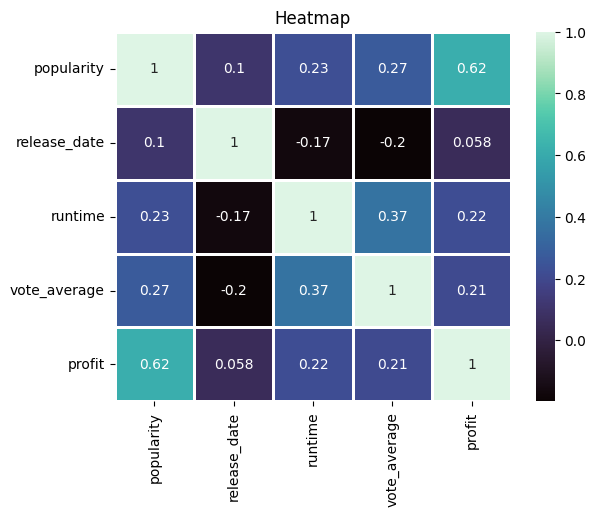

<Figure size 640x480 with 0 Axes>

In [3158]:
sns.heatmap(new_data.corr(), annot=True, cmap='mako', linewidths=2, linecolor='white')
plt.title('Heatmap')
plt.show()
plt.clf()

In [3159]:
new_data.dropna(inplace=True)

In [3160]:
X = new_data[['popularity', 'release_date', 'runtime', 'profit']]
y = new_data['vote_average']

In [3161]:
X.tail()

,popularity,release_date,runtime,profit
title,,,,
El Mariachi,14.269792,1992,81.0,1820920
Newlyweds,0.642552,2011,85.0,-9000
"Signed, Sealed, Delivered",1.444476,2013,120.0,0
Shanghai Calling,0.857008,2012,98.0,0
My Date with Drew,1.929883,2005,90.0,0


In [3162]:
y.tail()

title
El Mariachi                  6.6
Newlyweds                    5.9
Signed, Sealed, Delivered    7.0
Shanghai Calling             5.7
My Date with Drew            6.3
Name: vote_average, dtype: float64

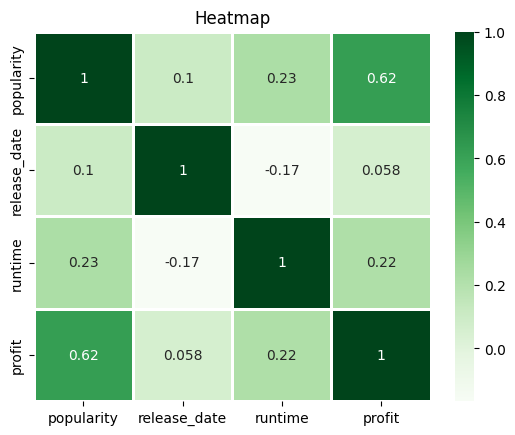

<Figure size 640x480 with 0 Axes>

In [3163]:
sns.heatmap(X.corr(), annot=True, cmap='Greens', linewidths=2, linecolor='white')
plt.title('Heatmap')
plt.show()
plt.clf() 

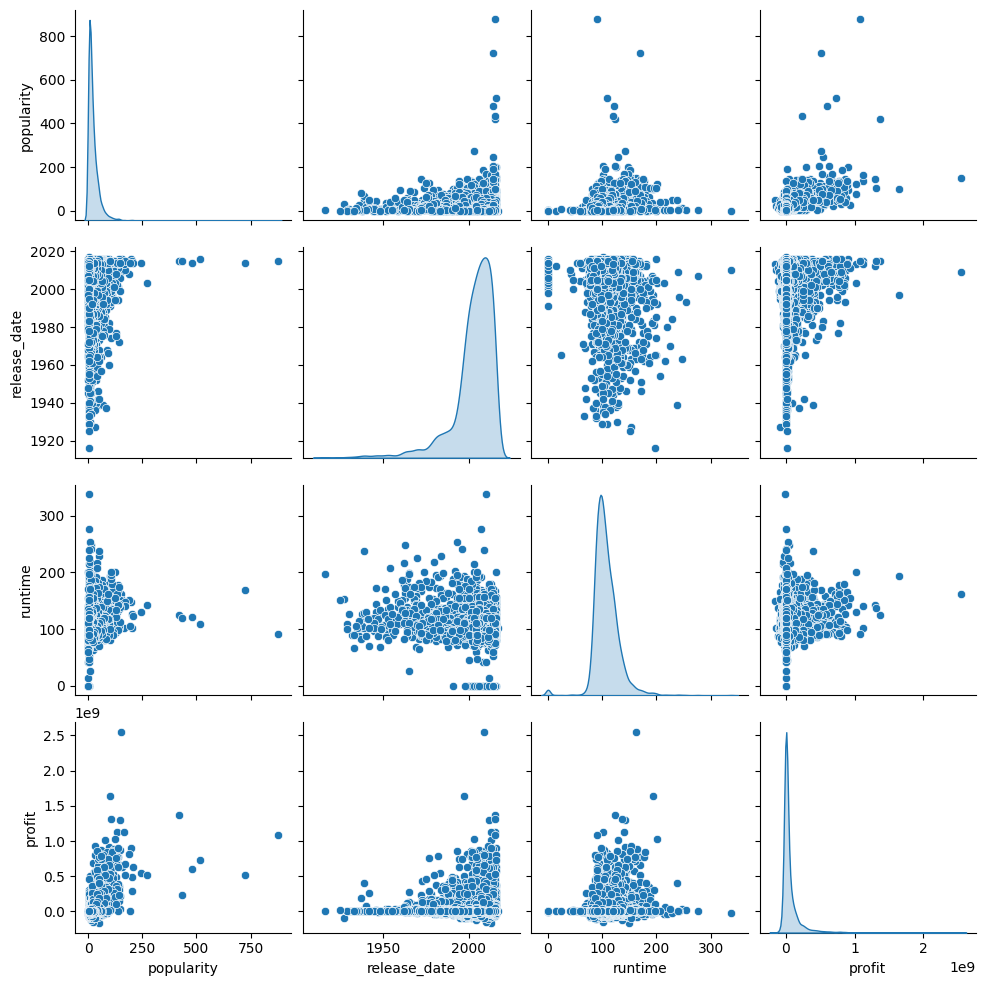

<Figure size 640x480 with 0 Axes>

In [3164]:
sns.pairplot(X, diag_kind='kde')
plt.show()
plt.clf()

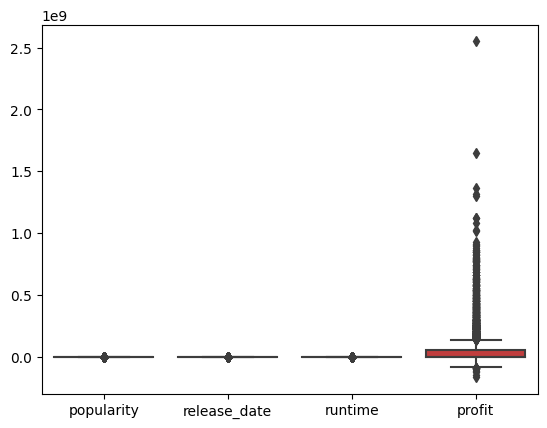

<Figure size 640x480 with 0 Axes>

In [3165]:
sns.boxplot(X)
plt.show()
plt.clf()

In [3166]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [3167]:
predictors = X

In [3168]:
predictors, y

(array([[ 4.05206402,  0.52658122,  2.44254103, 18.36714242],
        [ 3.69520126,  0.36545995,  2.75283514,  4.46912592],
        [ 2.69875326,  1.00994501,  1.82195281,  4.28289354],
        ...,
        [-0.63047829,  0.84882375,  0.58077638, -0.39159292],
        [-0.64894119,  0.76826311, -0.39443368, -0.39159292],
        [-0.61522296,  0.20433869, -0.74905552, -0.39159292]]),
 title
 Avatar                                      7.2
 Pirates of the Caribbean: At World's End    6.9
 Spectre                                     6.3
 The Dark Knight Rises                       7.6
 John Carter                                 6.1
                                            ... 
 El Mariachi                                 6.6
 Newlyweds                                   5.9
 Signed, Sealed, Delivered                   7.0
 Shanghai Calling                            5.7
 My Date with Drew                           6.3
 Name: vote_average, Length: 4800, dtype: float64)

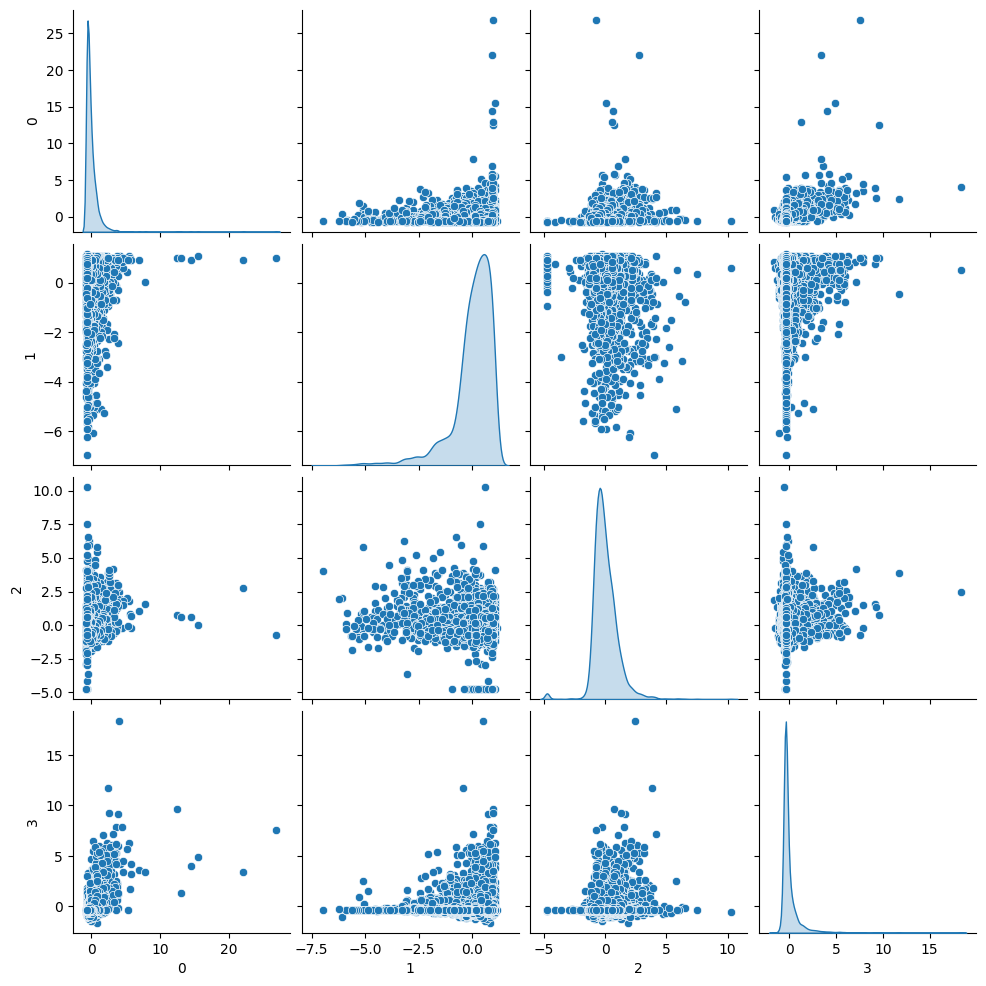

<Figure size 640x480 with 0 Axes>

In [3169]:
sns.pairplot(pd.DataFrame(predictors), diag_kind='kde')
plt.show()
plt.clf()

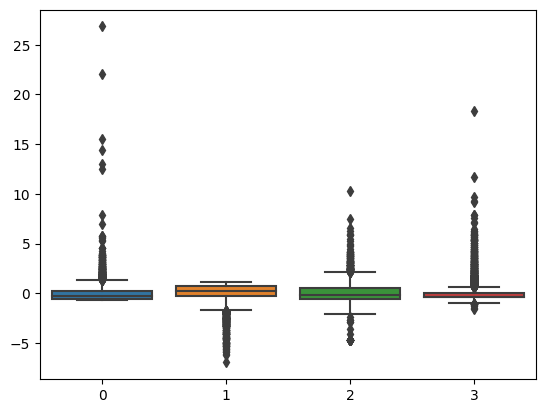

<Figure size 640x480 with 0 Axes>

In [3170]:
sns.boxplot(pd.DataFrame(predictors))
plt.show()
plt.clf()

In [3171]:
y = np.array(y)
pred_rate = y

In [3172]:
X_train, X_test, y_train, y_test = train_test_split(predictors, pred_rate, test_size=0.05, random_state=75)

In [3173]:
regressor = KNeighborsRegressor(n_neighbors=15, weights='uniform')
model = regressor.fit(X_train, y_train)

In [3174]:
model.predict([[-0.63047829,  0.84882375,  0.58077638, -0.39159292],
        [-0.64894119,  0.76826311, -0.39443368, -0.39159292],
        [-0.61522296,  0.20433869, -0.74905552, -0.39159292]])

array([5.98666667, 5.24      , 5.39333333])

In [3175]:
y_pred = model.predict(X_test)

In [3176]:
scores_and_k = []
accuracies = []
for k in range(1, 100):
  regressor = KNeighborsRegressor(n_neighbors = k)
  regressor.fit(X_train, y_train)
  a = regressor.score(X_test, y_test)
  print(f'Accuracy: {a}')
  scores_and_k.append([a, k])
  accuracies.append(a)
print(f'Max Accuracy: {max(scores_and_k)[0]}, number of neighbors: {max(scores_and_k)[1]}')


Accuracy: -0.3122230273976421
Accuracy: 0.09022338972658106
Accuracy: 0.22885195146650306
Accuracy: 0.2962413598483792
Accuracy: 0.30765628919423627
Accuracy: 0.2895703556862417
Accuracy: 0.2870488450125167
Accuracy: 0.3389500125421556
Accuracy: 0.34235200772555496
Accuracy: 0.3389434801694584
Accuracy: 0.33990579044488145
Accuracy: 0.3298065053141579
Accuracy: 0.3194337567211031
Accuracy: 0.3199690705039786
Accuracy: 0.30829721657051035
Accuracy: 0.3043425226760431
Accuracy: 0.30779136329132406
Accuracy: 0.29771299857649125
Accuracy: 0.29973891161883814
Accuracy: 0.3006051154575099
Accuracy: 0.29738462875883087
Accuracy: 0.298836115459468
Accuracy: 0.3000178615732747
Accuracy: 0.2974511189809267
Accuracy: 0.2946356085732602
Accuracy: 0.29748262662011093
Accuracy: 0.29746430245600286
Accuracy: 0.29128475542227816
Accuracy: 0.28649712590928955
Accuracy: 0.29610406389066957
Accuracy: 0.29130417760945204
Accuracy: 0.29177250244528485
Accuracy: 0.293961987670988
Accuracy: 0.292416712142629

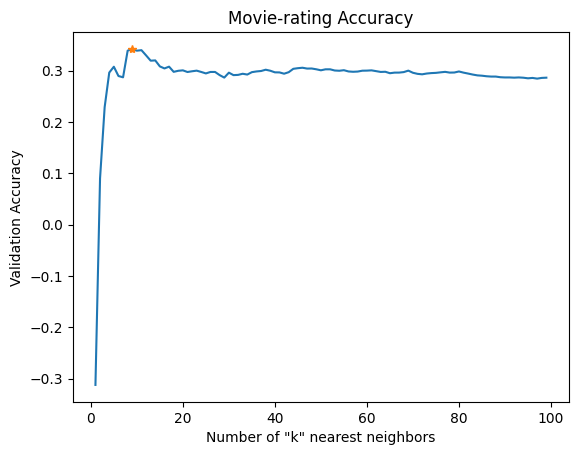

<Figure size 640x480 with 0 Axes>

In [3177]:
k_list = list(range(1, 100))
sns.lineplot(x=k_list, y=accuracies)
plt.xlabel('Number of "k" nearest neighbors')
plt.ylabel('Validation Accuracy')
plt.title('Movie-rating Accuracy')
plt.plot(max(scores_and_k)[1], max(scores_and_k)[0], '-*')
plt.show()
plt.clf()